# Hand Written Digit Prediction- Classification Analysis

The digit dataset consists of 8x8 images of digits the images attributes of the dataset stores 8x8 arrays of grayscale values for each Image. we will  use these arrays to visualize first 4 images . Tthe target attribute of the dataset stores the digit each image represents

#import library


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import data


In [40]:
from sklearn.datasets import load_digits

In [41]:
df = load_digits()

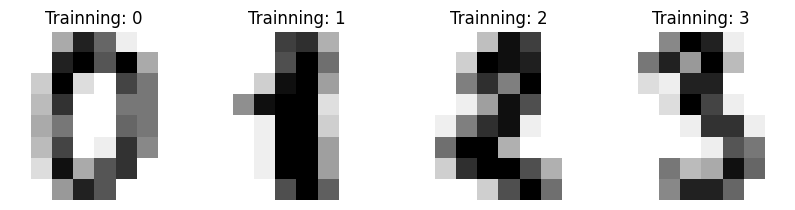

In [42]:
_,axes =plt.subplots(nrows=1 , ncols=4, figsize=(10, 3))
for ax, image , label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation ="nearest")
  ax.set_title("Trainning: %i" % label)

#Data Proccessing


Flatten image

In [43]:
df.images.shape

(1797, 8, 8)

In [44]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [45]:
df.images[0].shape

(8, 8)

In [46]:
len(df.images)

1797

In [47]:
n_samples = len(df.images)
data = df.images.reshape(n_samples, -1)

In [48]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [49]:
data[0].shape

(64,)

In [50]:
data.shape

(1797, 64)

#scaling image Data

In [51]:
data.min()

0.0

In [52]:
data.max()

16.0

In [53]:
data = data/16

In [54]:
data.min()

0.0

In [55]:
data.max()

1.0

In [56]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

#Train Test Split Data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(data , df.target, test_size=0.3)

In [59]:
x_train.shape ,x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

#random Forest Model

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier()

In [62]:
#or
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier( )

In [63]:
rf.fit(x_train, y_train)

RandomForestClassifier()

#Predict Test Data

In [64]:
y_pred = rf.predict(x_test)

In [65]:
y_pred

array([4, 2, 4, 6, 8, 6, 6, 9, 4, 8, 0, 2, 3, 7, 7, 8, 5, 7, 4, 6, 6, 4,
       1, 2, 2, 7, 2, 8, 9, 9, 4, 6, 2, 1, 3, 1, 1, 4, 5, 6, 1, 9, 5, 4,
       7, 4, 2, 9, 4, 3, 8, 8, 8, 2, 8, 1, 7, 7, 9, 4, 8, 8, 8, 7, 9, 7,
       2, 3, 0, 8, 3, 2, 7, 9, 9, 8, 8, 4, 0, 9, 5, 2, 3, 8, 1, 6, 3, 3,
       9, 3, 0, 8, 8, 4, 8, 0, 9, 2, 2, 5, 9, 3, 9, 2, 8, 1, 7, 0, 5, 7,
       6, 0, 4, 2, 6, 3, 6, 1, 2, 1, 4, 1, 2, 6, 0, 1, 6, 7, 1, 0, 1, 7,
       0, 6, 2, 9, 5, 3, 8, 4, 1, 5, 8, 3, 7, 2, 3, 7, 3, 4, 0, 5, 5, 0,
       3, 9, 1, 7, 9, 7, 8, 8, 4, 7, 6, 3, 5, 9, 9, 9, 2, 5, 3, 2, 2, 5,
       2, 0, 0, 0, 9, 9, 4, 3, 6, 2, 2, 1, 3, 5, 6, 6, 0, 5, 8, 4, 1, 6,
       4, 0, 3, 7, 1, 0, 0, 1, 9, 1, 3, 6, 6, 4, 5, 7, 8, 4, 6, 9, 4, 3,
       4, 3, 7, 8, 7, 3, 2, 6, 9, 3, 7, 3, 8, 9, 1, 9, 8, 5, 9, 2, 2, 6,
       0, 4, 4, 0, 1, 5, 4, 7, 0, 8, 7, 9, 0, 8, 1, 2, 5, 2, 6, 0, 7, 7,
       0, 3, 9, 5, 1, 1, 0, 4, 3, 5, 4, 9, 4, 8, 5, 3, 8, 6, 9, 7, 9, 4,
       5, 3, 1, 5, 5, 3, 4, 1, 8, 0, 2, 9, 1, 0, 0,

#model Accuracy

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
confusion_matrix(y_test, y_pred)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 52,  0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 52,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  1,  1, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  1,  0,  1,  1,  1,  0,  0, 62,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 59]])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      0.98      0.98        48
           2       1.00      0.98      0.99        47
           3       0.96      0.95      0.95        55
           4       0.96      0.98      0.97        53
           5       0.93      0.96      0.94        52
           6       1.00      0.96      0.98        56
           7       0.98      1.00      0.99        57
           8       0.95      0.93      0.94        67
           9       0.95      0.98      0.97        60

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



#thank you 🙂